In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import riiideducation

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/riiid-test-answer-prediction/example_test.csv
/kaggle/input/riiid-test-answer-prediction/train.csv
/kaggle/input/riiid-test-answer-prediction/lectures.csv
/kaggle/input/riiid-test-answer-prediction/questions.csv
/kaggle/input/riiid-test-answer-prediction/example_sample_submission.csv
/kaggle/input/riiid-test-answer-prediction/riiideducation/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/riiid-test-answer-prediction/riiideducation/__init__.py


In [2]:
train_path = r'/kaggle/input/riiid-test-answer-prediction/train.csv'
q_path = r'/kaggle/input/riiid-test-answer-prediction/questions.csv'
c_path = r'/kaggle/input/riiid-test-answer-prediction/lectures.csv'

**Method is from the**
[Official Guide](https://www.kaggle.com/sohier/competition-api-detailed-introduction)

In [3]:
train_df = pd.read_csv(train_path, low_memory=False, nrows=10**5, 
                       dtype={'row_id': 'int64', 
                              'timestamp': 'int64', 
                              'user_id': 'int32', 
                              'content_id': 'int16', 
                              'content_type_id': 'int8',
                              'task_container_id': 'int16', 
                              'user_answer': 'int8', 
                              'answered_correctly': 'int8', 
                              'prior_question_elapsed_time': 'float32', 
                              'prior_question_had_explanation': 'boolean',
                             }
                      )
train_df

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,<NA>
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...,...
99995,99995,153647401,2078569,4334,0,275,3,0,6000.0,True
99996,99996,153692472,2078569,6436,0,276,3,0,9000.0,True
99997,99997,153722998,2078569,6446,0,277,2,1,21000.0,True
99998,99998,153759775,2078569,3715,0,278,3,0,12000.0,True


In [4]:
train_df.count()

row_id                            100000
timestamp                         100000
user_id                           100000
content_id                        100000
content_type_id                   100000
task_container_id                 100000
user_answer                       100000
answered_correctly                100000
prior_question_elapsed_time        97834
prior_question_had_explanation     99652
dtype: int64

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          100000 non-null  int64  
 1   timestamp                       100000 non-null  int64  
 2   user_id                         100000 non-null  int32  
 3   content_id                      100000 non-null  int16  
 4   content_type_id                 100000 non-null  int8   
 5   task_container_id               100000 non-null  int16  
 6   user_answer                     100000 non-null  int8   
 7   answered_correctly              100000 non-null  int8   
 8   prior_question_elapsed_time     97834 non-null   float32
 9   prior_question_had_explanation  99652 non-null   boolean
dtypes: boolean(1), float32(1), int16(2), int32(1), int64(2), int8(3)
memory usage: 3.1 MB


In [6]:
train_df.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,100000.000000,1.000000e+05,1.000000e+05,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,97834.000000
mean,49999.500000,7.332661e+09,1.090868e+06,5156.21962,0.018180,974.593070,1.382490,0.655080,24715.625000
std,28867.657797,1.031230e+10,6.657180e+05,3896.63440,0.133603,1205.095836,1.193602,0.512165,17379.212891
min,0.000000,0.000000e+00,1.150000e+02,0.00000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,24999.750000,6.595929e+08,4.590170e+05,1797.00000,0.000000,124.000000,0.000000,0.000000,16000.000000
50%,49999.500000,4.015927e+09,1.282581e+06,4980.00000,0.000000,458.000000,1.000000,1.000000,21000.000000
75%,74999.250000,1.000065e+10,1.567938e+06,7427.00000,0.000000,1358.000000,3.000000,1.000000,28666.000000
max,99999.000000,5.949531e+10,2.078569e+06,32736.00000,1.000000,5630.000000,3.000000,1.000000,300000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9eb8b07e50>,
      dtype=object)

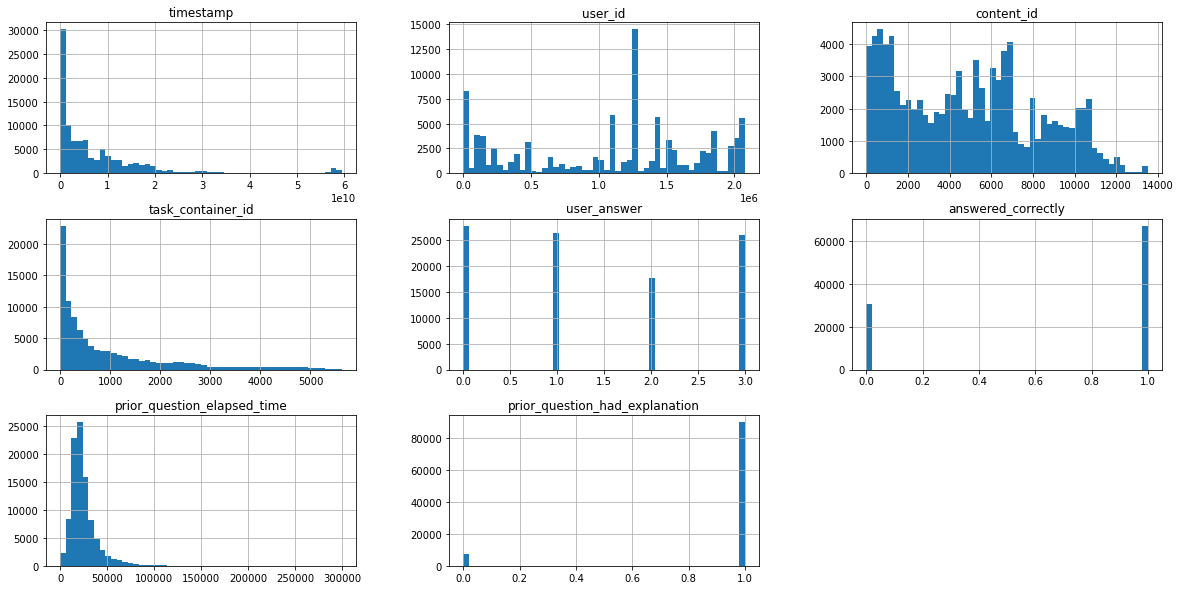

In [7]:
train_distro_df = train_df.drop(['row_id','content_type_id'],axis=1)
train_distro_df = train_distro_df.dropna()
train_distro_df["prior_question_had_explanation"] = train_distro_df["prior_question_had_explanation"].astype(int)

train_distro_df.hist(bins=50,figsize=(20,10))

In [8]:
corr_mat = train_df.drop('content_type_id', axis=1).corr()
corr_mat

,row_id,timestamp,user_id,content_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,1.000000,0.100032,0.984725,-0.043955,0.039891,-0.005664,0.002068,0.018922,0.018663
timestamp,0.100032,1.000000,0.104655,0.079253,0.555534,-0.000443,0.070084,-0.077948,0.157227
user_id,0.984725,0.104655,1.000000,-0.041602,0.016524,-0.007040,0.002158,0.015599,0.012820
content_id,-0.043955,0.079253,-0.041602,1.000000,0.033430,-0.098140,-0.189198,0.150349,-0.146338
task_container_id,0.039891,0.555534,0.016524,0.033430,1.000000,0.005621,0.101546,-0.052120,0.197153
user_answer,-0.005664,-0.000443,-0.007040,-0.098140,0.005621,1.000000,0.124352,0.011867,0.103995
answered_correctly,0.002068,0.070084,0.002158,-0.189198,0.101546,0.124352,1.000000,-0.005566,0.288408
prior_question_elapsed_time,0.018922,-0.077948,0.015599,0.150349,-0.052120,0.011867,-0.005566,1.000000,-0.013563
prior_question_had_explanation,0.018663,0.157227,0.012820,-0.146338,0.197153,0.103995,0.288408,-0.013563,1.000000


In [9]:
corr_mat['answered_correctly'].sort_values(ascending=False)

answered_correctly                1.000000
prior_question_had_explanation    0.288408
user_answer                       0.124352
task_container_id                 0.101546
timestamp                         0.070084
user_id                           0.002158
row_id                            0.002068
prior_question_elapsed_time      -0.005566
content_id                       -0.189198
Name: answered_correctly, dtype: float64

In [10]:
question_df = pd.read_csv(q_path)
question_df

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125


In [11]:
question_df[question_df['question_id']!=question_df['bundle_id']]

,question_id,bundle_id,correct_answer,part,tags
1401,1401,1400,0,3,136 92 102
1402,1402,1400,1,3,82 92 102
1404,1404,1403,0,3,136 38 29
1405,1405,1403,3,3,82 38 29
1407,1407,1406,3,3,136 38 102
...,...,...,...,...,...
13246,13246,13244,1,3,136 81 92
13248,13248,13247,2,3,136 81 92
13249,13249,13247,1,3,136 81 92
13251,13251,13250,2,3,136 81 92


In [12]:
lecture_df = pd.read_csv(c_path)
lecture_df

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
...,...,...,...,...
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept
